In [11]:
import pandas as pd
import numpy as np

## Zum Aufwärmen

##### Numpy Array mit Inhalt: array([1,2,3,4,5,6,7,8,9])

In [12]:
array = np.array([*range(1,10,1)])
array

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

##### Ändern Sie die Gestalt des Arrays

In [13]:
array = np.reshape(array, (3,3))
array

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

##### Spaltenweiser Mittelwert

In [14]:
np.mean(array, axis=0)

array([4., 5., 6.])

## Convolutional Neural Networks 1

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import tensorflow.keras as keras

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

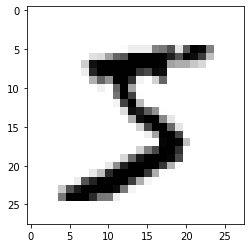

In [6]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

plt.imshow(X_train[0], cmap='gray_r')

X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000, 28, 28, 1)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

y_train[0]

In [7]:
model = Sequential()
model.add(Conv2D(10, kernel_size=(3,3), activation="relu",
                input_shape =(28,28,1)))
model.add(Flatten())
model.add(Dense(10, activation="softmax"))

model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])

model.fit(X_train, y_train, epochs=10, batch_size=1000)

Epoch 1/10
60/60 [==============================] - 4s 55ms/step - loss: 29.7958 - accuracy: 0.5908
Epoch 2/10
60/60 [==============================] - 3s 53ms/step - loss: 2.0507 - accuracy: 0.8782
Epoch 3/10
60/60 [==============================] - 3s 52ms/step - loss: 0.6013 - accuracy: 0.9274
Epoch 4/10
60/60 [==============================] - 3s 53ms/step - loss: 0.2216 - accuracy: 0.9575
Epoch 5/10
60/60 [==============================] - 3s 53ms/step - loss: 0.1055 - accuracy: 0.9740
Epoch 6/10
60/60 [==============================] - 3s 52ms/step - loss: 0.0589 - accuracy: 0.9841
Epoch 7/10
60/60 [==============================] - 3s 53ms/step - loss: 0.0385 - accuracy: 0.9883
Epoch 8/10
60/60 [==============================] - 3s 52ms/step - loss: 0.0264 - accuracy: 0.9912
Epoch 9/10
60/60 [==============================] - 3s 52ms/step - loss: 0.0158 - accuracy: 0.9949
Epoch 10/10
60/60 [==============================] - 3s 52ms/step - loss: 0.0153 - accuracy: 0.9951


Bei RGB bräuchte man den für jeden Farbraum (Rot, Grün, Blau) jeweils 255 Werte

In [8]:
model.layers

In [140]:
import tensorflow.keras.backend as K
data = K.eval(model.layers[0].weights[0])
data

array([[[[-0.09599455,  0.05789097, -0.00791918, -0.0638128 ,
           0.06638742,  0.05671501, -0.05714035,  0.150179  ,
          -0.29565513, -0.05477183]],

        [[-0.02939121, -0.17191254,  0.08186774,  0.03436102,
          -0.08086655, -0.15725644, -0.1400085 ,  0.10900571,
          -0.2017099 , -0.20374046]],

        [[-0.23727432, -0.10286281, -0.1887831 ,  0.10180952,
          -0.03762229, -0.06421971, -0.24739279, -0.17705293,
           0.14332826,  0.2440836 ]]],


       [[[ 0.27440843, -0.01451355, -0.10635763,  0.0331113 ,
          -0.04314496, -0.22765008,  0.08865548, -0.24292558,
           0.14680521,  0.15826741]],

        [[ 0.02766591,  0.03738552,  0.05727853, -0.10405748,
          -0.08998667, -0.11340152,  0.09187775,  0.05234717,
          -0.02299821, -0.11816031]],

        [[-0.11393639,  0.03079819,  0.13661961, -0.16594973,
           0.11923804,  0.0377758 ,  0.14010715, -0.16787471,
          -0.06650813, -0.2325994 ]]],


       [[[-0.10778

In [16]:
data.shape

(3, 3, 1, 10)

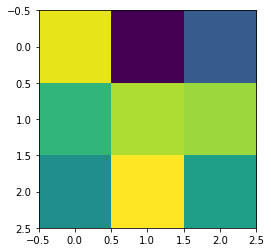

In [143]:
plt.imshow(data[:,:,0,1].reshape(3,3))
plt.show()

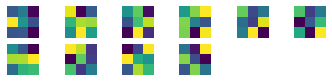

In [146]:
for i in range(10):
    plt.subplot(6,6,i+1)
    plt.imshow(data[:,:,0,i]); 
    plt.axis('off');